# From Data to Viz

The purpose of this Recap is to choose the right data visualization for a given question on a dataset.

(Freely inspired from https://www.data-to-viz.com/)

Let's start by running the following cell:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## A - Penguins 🐧


Let's explore the Seaborn [**Penguins**](https://github.com/mwaskom/seaborn-data/blob/master/penguins.csv) dataset, quite known in the Machine Learning beginners community.

Here's a nice picture to get used to the vocabulary around these Penguins:

<img src="https://wagon-public-datasets.s3.amazonaws.com/05-Machine-Learning/gentoo.png" height=700>

In [2]:
penguin_df = sns.load_dataset('penguins')
penguin_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [3]:
penguin_df.shape

(344, 7)

In [6]:
penguin_df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [4]:
penguin_df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


---

### ❓ 1 - Counting Species

How many different species are there in the dataset? Use a Seaborn plot to visualize their relative importance.

<AxesSubplot:xlabel='species', ylabel='count'>

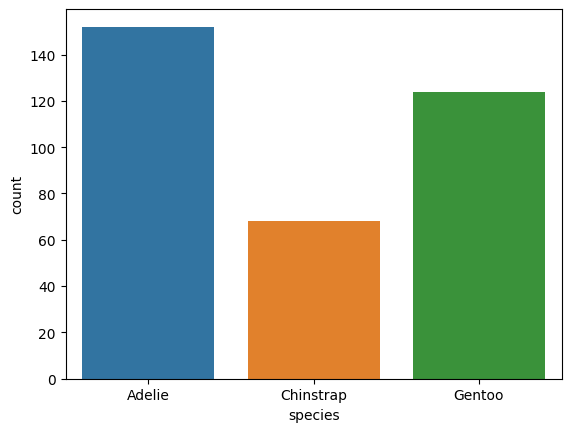

In [8]:
sns.countplot(x='species', data=penguin_df)

---
### ❓ 2 - Body mass distribution

Let's see if the body mass distribution in the dataset is normal or not. Use a Seaborn plot to visualize the distribution of the `body_mass_g` column of `penguin_df`.

In [10]:
penguin_df['body_mass_g'].describe()

count     342.000000
mean     4201.754386
std       801.954536
min      2700.000000
25%      3550.000000
50%      4050.000000
75%      4750.000000
max      6300.000000
Name: body_mass_g, dtype: float64

<AxesSubplot:xlabel='body_mass_g', ylabel='Count'>

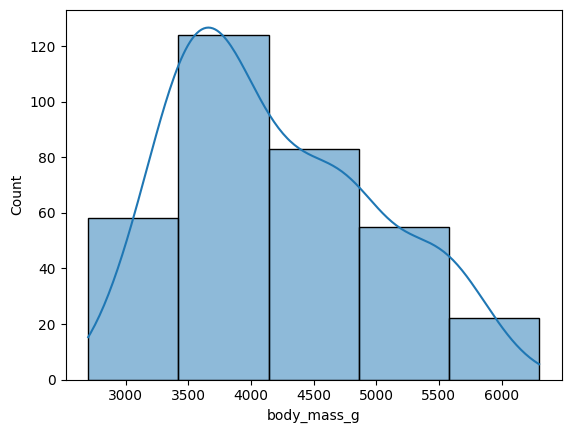

In [16]:
sns.histplot(data=penguin_df, x='body_mass_g', kde=True, bins=5)

---
### ❓ 3 - Relationships of Numerical variables

Let's use a Seaborn plot to quickly get a sense of the `(x, y)` relationship of all couples of numerical columns ('bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', etc.). You should use a plot which will draw 16 subplots in one line of code!

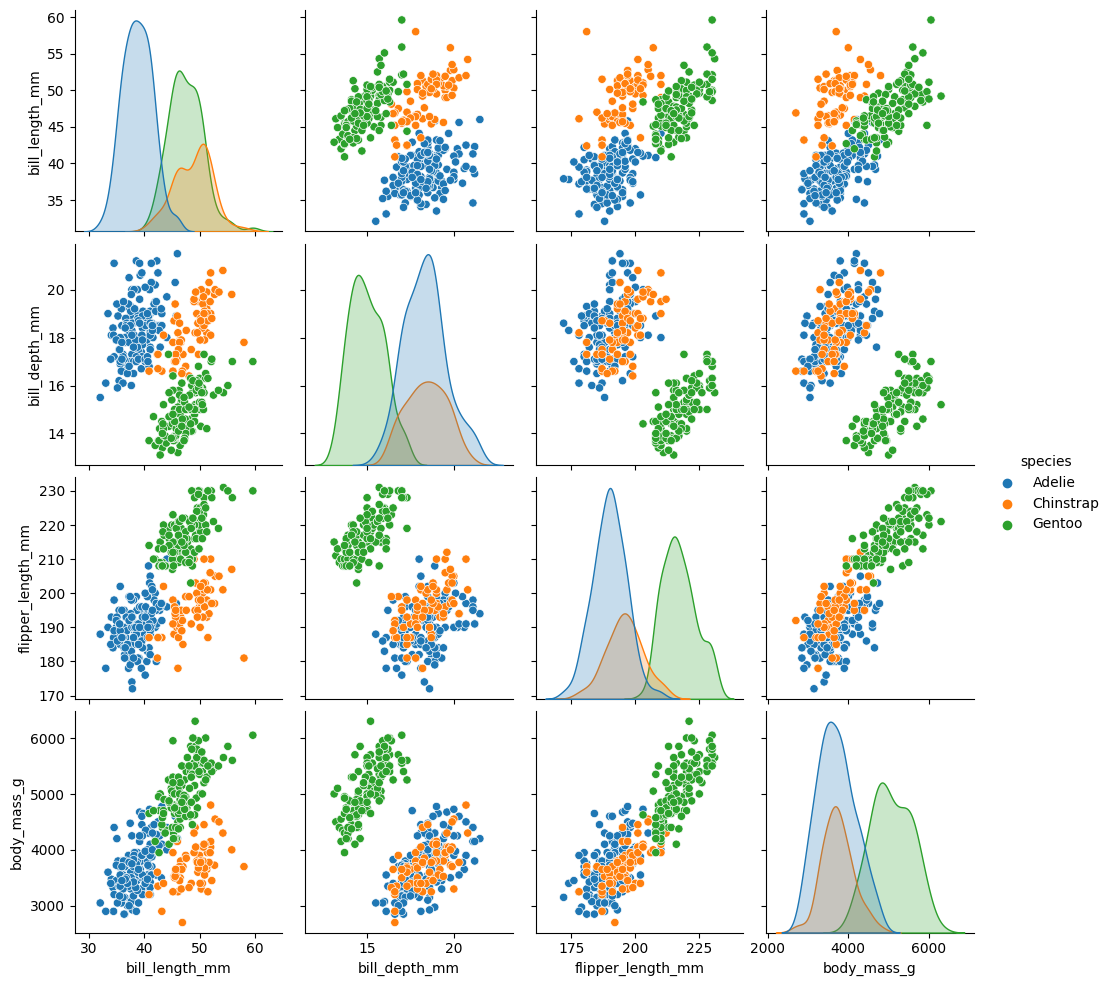

In [24]:
sns.pairplot(penguin_df, hue='species')

---

### ❓ 4 - Numerical + Categorical

We learned a lot about this sample of penguins:
- `bill_length_mm` seems to be an important dimension to identify penguins
- some of their dimensions are correlated
- there are 3 species
 
How can you visualize the differences between the 3 species of  penguins with different colors? Using Seaborn, write some code to get some helpful scatterplots and/or violin-plots (we want to use the `species` as colors to better identify groups!).

In [20]:
penguin_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


<AxesSubplot:xlabel='flipper_length_mm', ylabel='bill_length_mm'>

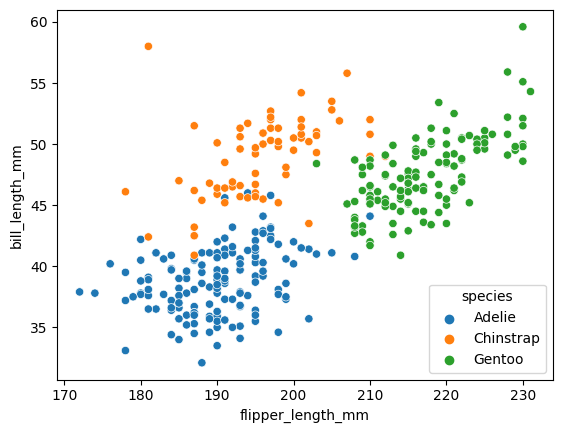

In [22]:
sns.scatterplot(data=penguin_df, x='flipper_length_mm', y='bill_length_mm', hue='species')

<AxesSubplot:xlabel='flipper_length_mm', ylabel='bill_depth_mm'>

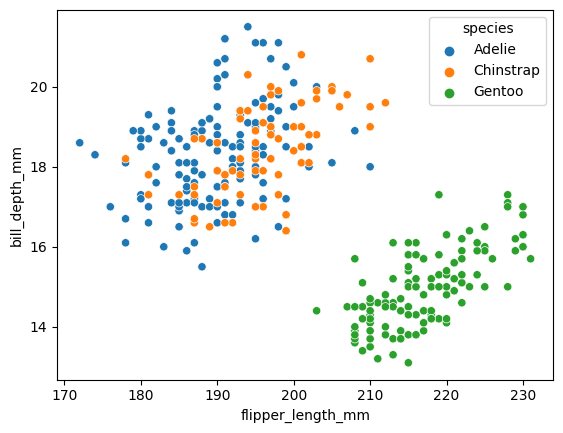

In [23]:
sns.scatterplot(data=penguin_df, x='flipper_length_mm', y='bill_depth_mm', hue='species')

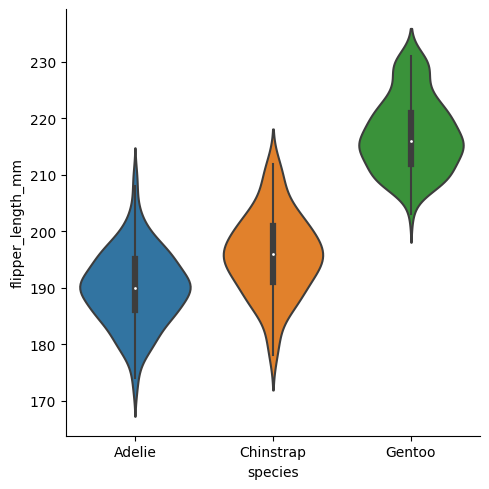

In [32]:
sns.catplot(data=penguin_df, x='species', y='flipper_length_mm', kind='violin')

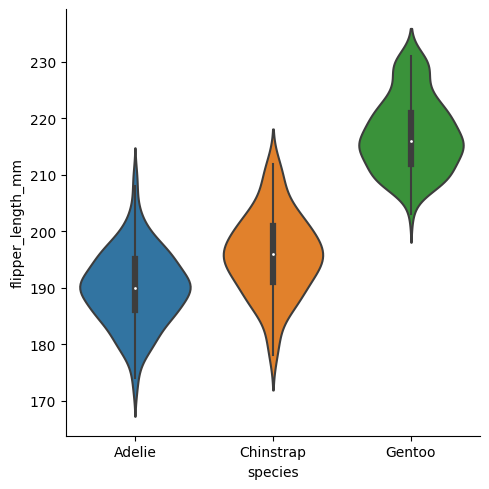

In [28]:
sns.catplot(data=penguin_df, x='species', y='flipper_length_mm', kind='violin')

---
## B - Maps 🗺


😱 **Imagine a world where people can't go further than 100km from home**. How can you help them to know where they can go?

For this second part of the Recap, we will be using the [`folium`](https://python-visualization.github.io/folium/) package, a wrapper around the [`Leaflet`](https://leafletjs.com/) JavaScript library.

In [33]:
!pip install --quiet folium

Now import Folium:

In [34]:
import folium

---

### ❓ 1 - Draw your first map

The goal of this first question is to:

- Draw a map centered at specific coordinates (check out [gps-coorinates.net](https://www.gps-coordinates.net/))
- Put a marker at that specific point
- Draw a circle of 100km centered at specific point

Check out the [`folium` Quickstart](https://python-visualization.github.io/folium/quickstart.html), you should find all the code examples you need, good luck!

In [35]:
coordinates = [31.23232, 121.435271] # 425 Yanping Road, Shanghai, China


m

In [37]:

m

In [40]:
m = folium.Map(location=coordinates)
folium.Marker(
    coordinates, popup="<i>Le Wagon Shanghai</i>", tooltip='Le Wagon Shanghai'
).add_to(m)

folium.Circle(
    radius=100*1000,
    location=coordinates,
    popup="Le Wagon",
    color="crimson",
    fill=False,
).add_to(m)
m

---

### ❓ 2 - Build a User-Friendly tool

The problem of the previous code is that we need to manually convert an address into the GPS coordinates. Let's implement a program so that user can specify their plain text address and get the map drawn for that point:

```python
draw_100km_map("138 Kingsland Rd, London E2 8DY")
```

💡 Hint: You can use the [Nominatim Search API](https://nominatim.org/release-docs/latest/api/Search/) to implement a `geocode(address)` function which returns a list of `[lat, lng]` coordinates. 

In [47]:
import requests
def draw_100km_map(address):
    url = f'https://nominatim.openstreetmap.org/search/{address}?format=json&addressdetails=1&limit=1&polygon_svg=1'
    response = requests.get(url)
    coordinates = response.json()[0]['lat'], response.json()[0]['lon']
    coordinates = [float(i) for i in list(coordinates)]
    m = folium.Map(location=coordinates)
    folium.Marker(
        coordinates, popup="<i>Le Wagon Shanghai</i>", tooltip='Le Wagon Shanghai'
    ).add_to(m)

    folium.Circle(
        radius=100*1000,
        location=coordinates,
        popup="Le Wagon",
        color="crimson",
        fill=False,
    ).add_to(m)
    return m

In [60]:
draw_100km_map('Pacific Ocean')
draw_100km_map('90 York Way, London, N1 9AG')

The interactive tool:

In [ ]:
address = input("Input your address > ")
draw_100km_map(address)